# Ultralytics


![detr](./images/ultralytics.png)

[Ultralytics](https://docs.ultralytics.com/) est une bibliothèque Python super pratique pour utiliser ou entraîner des modèles YOLO. Leur documentation est top, mais on va quand même te montrer deux modèles YOLO ici. Et devine quoi ? Cette lib peut aussi faire tourner [SAM](https://segment-anything.com/) (*segment anything*) !


## YOLO


Avec tous les modèles YOLO (YOLOv4, YOLOv5, YOLO-NAS, etc.), c'est facile de se perdre. Mon conseil ? Teste-les toi-même ! Les auteurs sont différents, donc difficile de dire quel modèle est le meilleur.


### [YOLOv8](https://sh-tsang.medium.com/review-yolov8-object-detection-5214fa105731)


Pour la plupart des modèles YOLO (sauf YOLO-World), la façon de charger le modèle et de faire l'inférence est la même.
Sur la page des [docs de YOLOv8](https://docs.ultralytics.com/models/yolov8/#performance-metrics), tu verras qu'il y a plusieurs modèles disponibles.

![yolov8](./images/yolov8.png)


YOLOv8, c'est pas que de la détection ! Il peut aussi faire :
- [Segmentation sémantique](https://docs.ultralytics.com/tasks/segment/)
- [Estimation de pose](https://docs.ultralytics.com/tasks/pose/) (position d'une personne dans l'image, son squelette)
- [Détection orientée](https://docs.ultralytics.com/fr/tasks/obb/#visual-samples) (les *bounding box* peuvent être orientées)
- [Classification](https://docs.ultralytics.com/tasks/classify/#export)


Dans ce notebook, on va se concentrer sur un exemple de détection.

Pour commencer, tu dois télécharger un modèle. Le choix dépend de tes ressources et de la vitesse que tu veux. Plus le modèle est gros, plus il est performant, mais moins il est rapide.


Prenons le modèle le plus rapide, yolov8n.
Voici comment le charger avec la bibliothèque Ultralytics :


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# On charge le modèle pre-entrainé YOLOv8n
model = YOLO("yolov8n.pt")

# Affiche les informations du modèle
model.info()

# On fait une prédiction sur une image
results = model("images/coco.jpg")

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco.jpg: 448x640 6 persons, 2 cars, 1 backpack, 3 handbags, 5 cell phones, 79.1ms
Speed: 1.1ms preprocess, 79.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


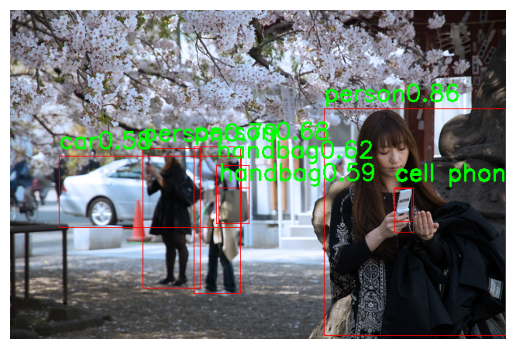

In [2]:
# Seuil de détection
threshold=0.5
# Les noms des classes
names={0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
image=cv2.imread("images/coco.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#Conversion de l'image en RGB
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

En quelques lignes de code, on a pu utiliser le modèle YOLOv8 !


### [YOLO-World](https://arxiv.org/pdf/2401.17270)


YOLO-World, c'est la nouvelle version de YOLO qui fait de la détection *open-vocabulary*. Les anciennes versions sont entraînées sur des classes spécifiques (généralement les 80 classes de [COCO](https://cocodataset.org/#home)), donc il faut les réentraîner ou les finetuner pour d'autres classes. YOLO-World, lui, peut détecter n'importe quelle classe. Il suffit de donner un prompt textuel avec l'image en entrée.

![yolov8](./images/yoloworld.png)


Pour l'utiliser, c'est presque pareil qu'un autre modèle YOLO, sauf qu'il faut ajouter un *prompt* textuel.


In [3]:
# On charge le modèle pre-entrainé YOLOv8s-world
model = YOLO("yolov8s-worldv2.pt") 

# On définit les classes du modèle
model.set_classes(["person", "surfboard"])
names={0: 'person', 1: 'surfboard'}

# On fait une prédiction sur notre image
results = model.predict("images/coco2.jpg")


image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco2.jpg: 640x384 2 persons, 1 surfboard, 155.2ms
Speed: 2.6ms preprocess, 155.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)


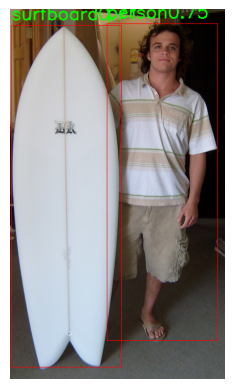

In [4]:
# Seuil de détection
threshold=0.5
# Les noms des classes
image=cv2.imread("images/coco2.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

On détecte bien la personne et la planche de surf.


## Segment Anything (SAM)


[SAM](https://segment-anything.com/) est un modèle de segmentation qui permet de segmenter n'importe quel objet. On l'a déjà utilisé dans [le cours 6 sur HuggingFace](../06_HuggingFace/README.md). Tu peux aussi l'utiliser via la bibliothèque Ultralytics. À toi de choisir !

Voici comment l'utiliser avec Ultralytics en Python :


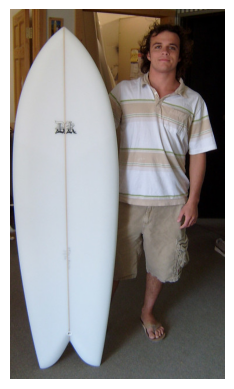

In [5]:
from PIL import Image
raw_image = Image.open("images/coco2.jpg")
plt.imshow(raw_image)
plt.axis('off')
plt.show()


On utilise FastSAM, une version plus rapide de SAM. Tu peux télécharger les poids sur ce [lien](https://docs.ultralytics.com/models/fast-sam/#available-models-supported-tasks-and-operating-modes).


In [6]:
from ultralytics import FastSAM

resized_image=raw_image.resize((1024,1024))
model = FastSAM('./FastSAM-s.pt')

In [7]:
results = model(resized_image,retina_masks=True)


0: 640x640 30 objects, 292.8ms
Speed: 4.2ms preprocess, 292.8ms inference, 199.2ms postprocess per image at shape (1, 3, 640, 640)


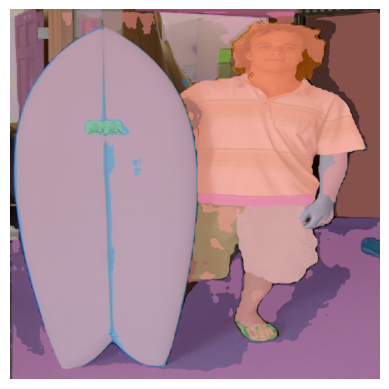

In [39]:
import numpy as np

def draw_masks(image,masks):
    image_np = np.array(image)
    plt.cm.get_cmap('tab20', 38)
    colors = plt.cm.get_cmap('tab20', 38)
    for i, mask in enumerate(masks):
        color = colors(i)[:3] 
        color = tuple(int(c * 255) for c in color) 
        mask =mask.data.squeeze().numpy()>0.5
        image_np[mask] = image_np[mask] * 0.5 + np.array(color) * 0.5       
    return image_np

image_np = draw_masks(resized_image,results[0].masks)
plt.imshow(image_np)
plt.axis('off')
plt.show()

Les résultats sont moyens, mais c'est le plus petit modèle de FastSAM, et il est très rapide (tu peux comparer au temps de traitement du notebook 2 du cours 6 sur Hugging Face).

**Note** : Tu peux aussi faire des *prompts* avec des points, des *box* ou du texte (voir la [documentation](https://docs.ultralytics.com/models/fast-sam/#predict-usage) pour plus de détails).


Tu sais maintenant comment utiliser des modèles rapides de détection et de segmentation d'images avec la bibliothèque Ultralytics !
